In [1]:
import sys
print(sys.version)

3.12.4 (main, Jun 29 2024, 17:30:33) [Clang 13.0.0 (clang-1300.0.29.30)]


In [2]:
import pandas as pd

In [5]:
df = pd.read_csv("./Student_performance_data.csv")

In [6]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [9]:
mobil = pd.read_csv('./OD_EU_Cellular_1km.csv')
mobil.head()

,Cell_grid_code,X,Y,Technology,Strength,Deviation,Measurements
0,1kmN2537E1113,1113000,2537000,3G,-104.0,0.0,2.0
1,1kmN2537E1114,1114000,2537000,3G,-104.0,0.0,1.0
2,1kmN2528E1126,1126000,2528000,2G,-104.0,0.0,1.0
3,1kmN2528E1126,1126000,2528000,3G,-104.0,0.0,81.0
4,1kmN1050E1717,1717000,1050000,2G,-100.0,5.0,11.0


In [10]:
mobil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74405 entries, 0 to 74404
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Cell_grid_code  74405 non-null  object 
 1   X               74405 non-null  int64  
 2   Y               74405 non-null  int64  
 3   Technology      74405 non-null  object 
 4   Strength        74405 non-null  float64
 5   Deviation       74405 non-null  float64
 6    Measurements   74405 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 4.0+ MB


In [11]:
def translate_cell_code(cell_code):
    northing_part = cell_code.split('N')[1].split('E')[0]
    easting_part = cell_code.split('E')[1]
    northing = int(northing_part) * 1000
    easting = int(easting_part) * 1000
    return northing, easting

In [18]:
mobil[['Translated_Northing', 'Translated_Easting']] = mobil['Cell_grid_code'].apply(
    lambda code: pd.Series(translate_cell_code(code)))

In [13]:
from matplotlib import pyplot as plt

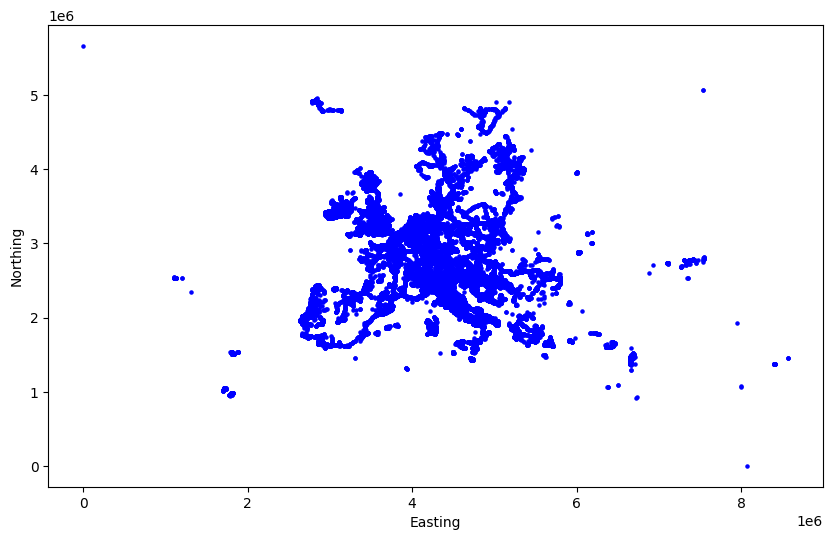

In [32]:

plt.figure(figsize=(10,6))
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.scatter(mobil['Translated_Easting'], mobil['Translated_Northing'], c='blue', marker='o', s=5)


In [28]:
tech_counts = Counter(mobil['Technology'])
tech_counts

Counter({'3G': 49751, '2G': 14592, '4G': 10062})

In [27]:
from collections import Counter 

Text(0, 0.5, 'Count')

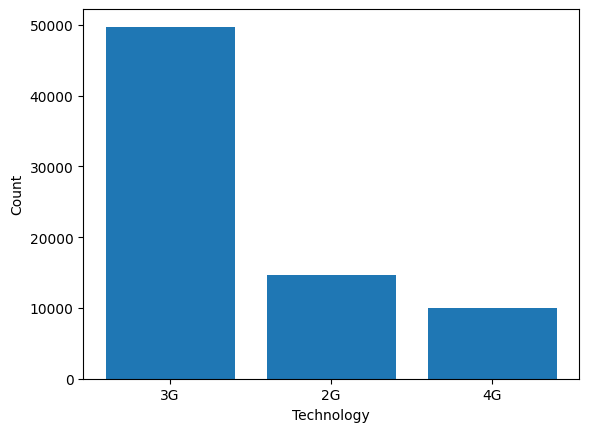

In [29]:
# Create a bar plot
plt.bar(tech_counts.keys(), tech_counts.values())

# Label the axes
plt.xlabel('Technology')
plt.ylabel('Count')